<a href="https://colab.research.google.com/github/MariaZharova/3-day-intensive/blob/main/%D0%9F%D0%BE%D0%B3%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_DS%2C_%D0%B4%D0%B5%D0%BD%D1%8C_2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

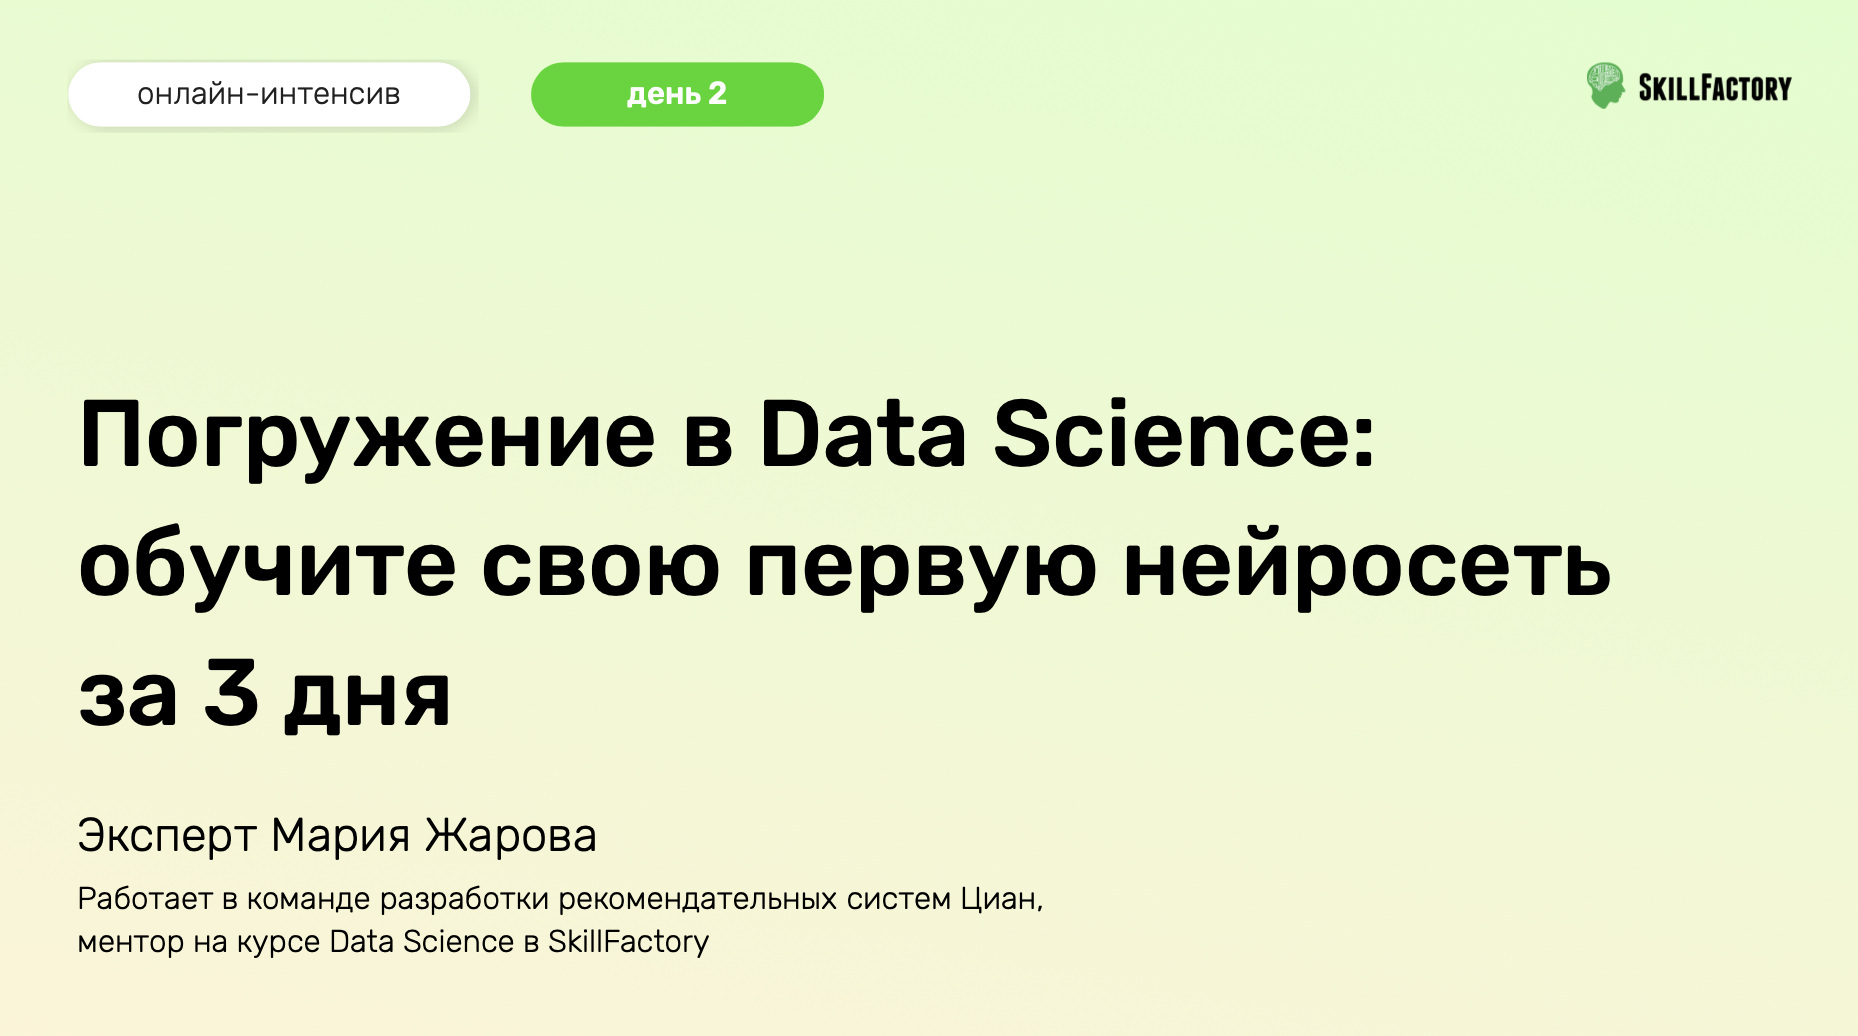

# Что такое машинное обучение и глубокое обучение?

### ⛳ Machine learning и Deep learning – это 2 подмножества искусственного интеллекта:

- ML связан с созданием алгоритмов, которые могут изменять себя без вмешательства человека для получения желаемого результата - путем подачи себя через структурированные данные.
- В DL алгоритмы создаются и функционируют аналогично ML, но устроены они более сложно - существует множество уровней этих алгоритмов, каждый из которых обеспечивает различную интерпретацию данных, которые он передает. Такая сеть алгоритмов называется искусственными нейронными сетями. Простыми словами, это напоминает нейронные связи, которые имеются в человеческом мозге.





### ⛳ Более практическое объяснение работы ML:

- Имеем табличные данные: назовём колонки-характеристики $x_1,\; x_2\;, ..., x_N$, колонку-ответ $Y$ (пусть есть в числовом и бинарном формате):
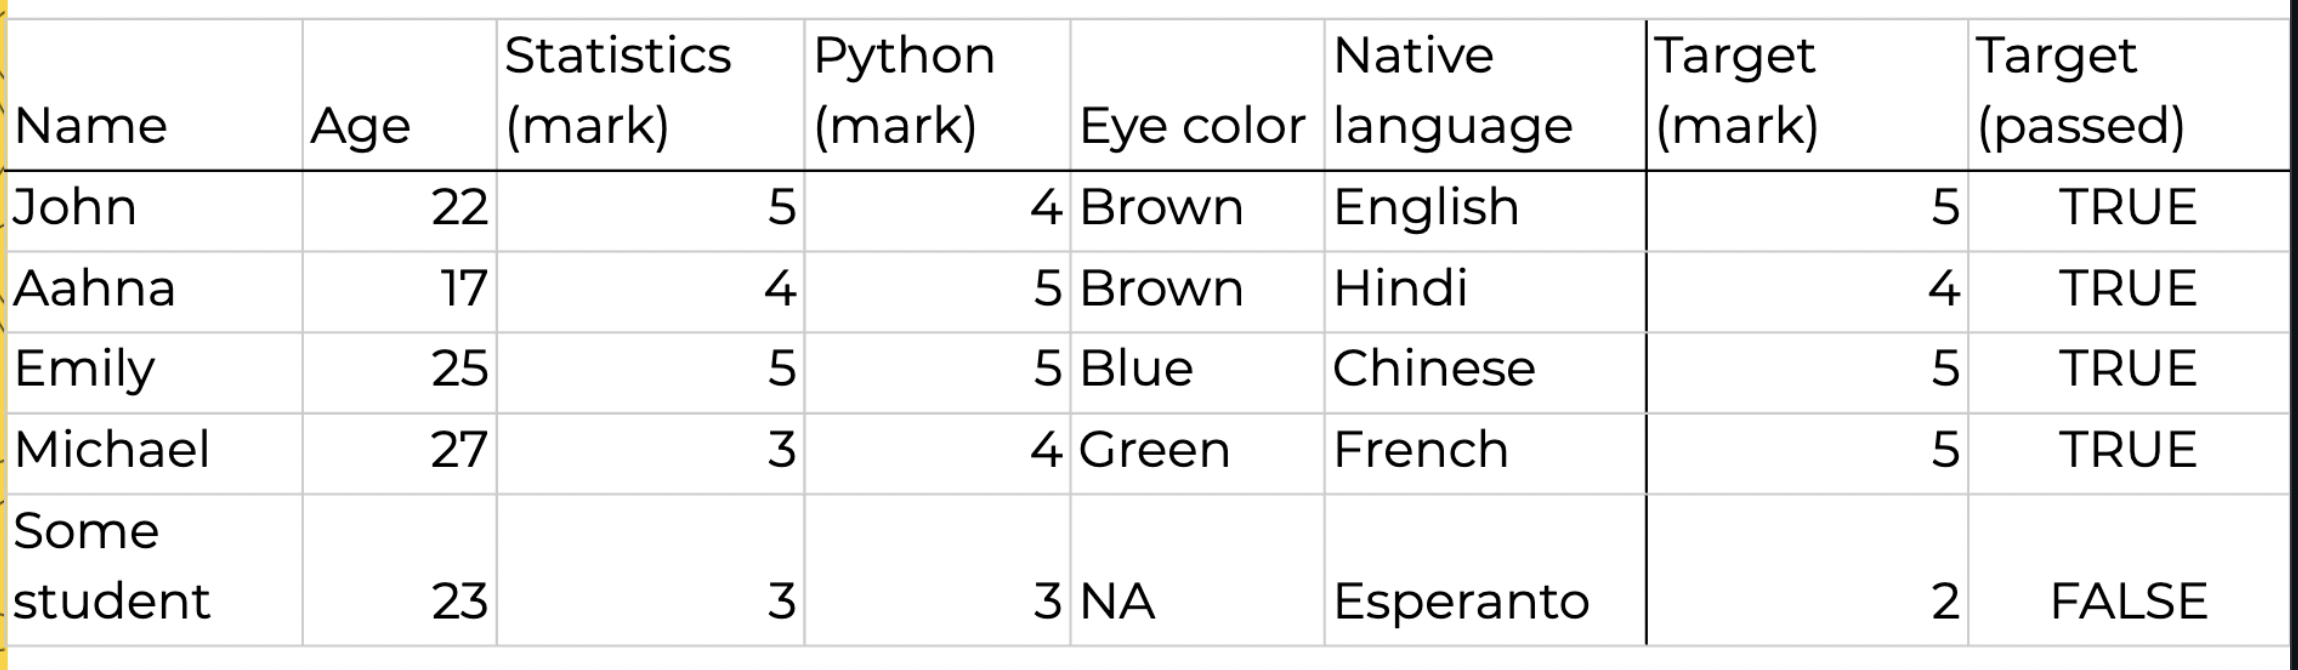


- Цель: написать алгоритм (модель машинного обучения), который бы как можно точнее предсказывал Target, видя только столбцы-характеристики. Например, очень популярный подход - подобрать такие коэффициенты $a_1, a_2, ..., a_N$, чтобы сумма $x_1\cdot a_1 + ... + x_N\cdot a_N$ максимально точно приближала истинный ответ Target (пытаемся вывести закономерности, понять, какие столбцы влияют на итоговый ответ больше всего).

- Все задачи в ML и DL можно разделить на два больших типа: классификация (когда множество значений таргета ограничено) и регресиия (таргет - любое действительное число)
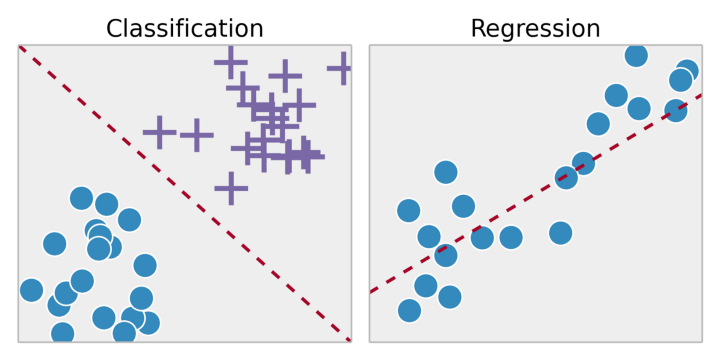

- Для решения таких задач предсказания используются широко известные алгоритмы (модели), которые реализованы в библиотеках Python (например, sklearn). Перейдём к коду и посмотрим на них :) 

In [27]:
# выгрузка нужных библиотек

# для обработки файлов
import pandas as pd
import numpy as np

# для визаулизации
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# для машинного обучения
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

## 🏠 Задача на файле Boston Dataset
Содержит информацию о различных домах в Бостоне. В этом наборе данных 506 образцов и 13 переменных признаков:
- CRIM - уровень преступности на душу населения
- ZN - доля земель под жилую застройку
- INDUS - доля акров неторгового бизнеса
- CHAS - 1, если участок граничит с рекой; 0 в противном случае
- NOX - концентрация оксидов азота
- RM - среднее количество комнат в квартире
- AGE - доля жилых единиц, построенных до 1940 г.
- DIS - расстояния до пяти центров занятости Бостона
- RAD - индекс доступности к радиальным магистралям
- TAX - полная ставка налога на имущество за 10 000 долларов США
- PTRATIO - соотношение учеников и учителей по городам
- B - доля чернокожих по городам.
- LSTAT - процент более низкого статуса населения
- PRICE - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

Мы хотим предсказать стоимость дома, используя заданные характеристики.

In [13]:
# загрузка файла
data = pd.read_csv('https://raw.githubusercontent.com/MariaZharova/3-day-intensive/main/boston_dataset.csv')

In [14]:
# посмотрим на данные
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


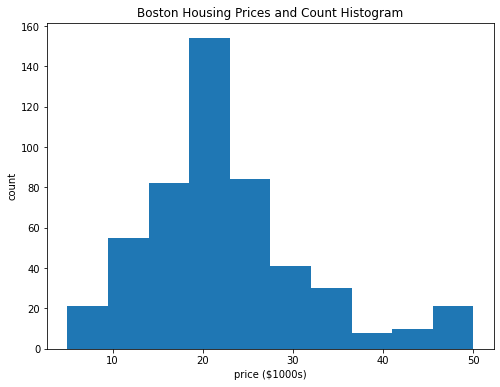

In [15]:
# Посмотрим как распределены цены на дома
plt.figure(figsize=(8, 6));
plt.hist(data['PRICE']);
plt.title('Boston Housing Prices and Count Histogram');
plt.xlabel('price ($1000s)');
plt.ylabel('count');
plt.show();

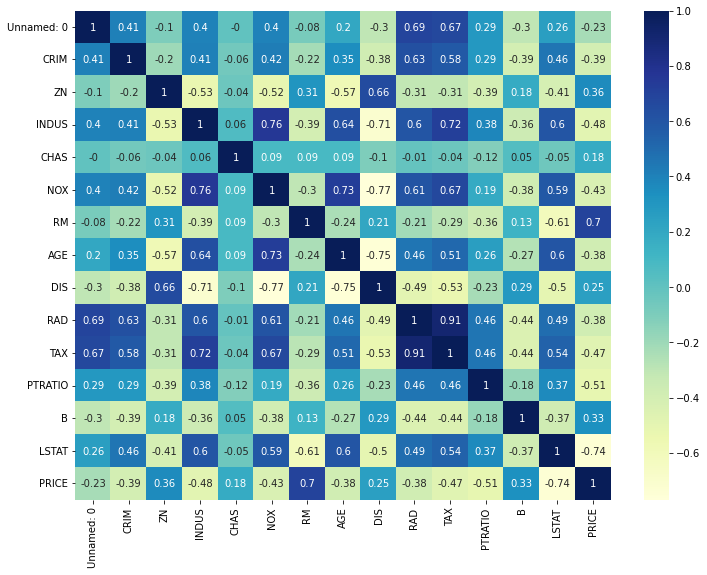

In [16]:
# "карта корреляций" - показывает линейную зависимость между колонками
# ближе к 1 - значит ближе к y=x
# близко к 0 - нет никакой связи между колонками
# ближе к -1 == y=-x
plt.figure(figsize=(12, 9));
correlation_matrix = data.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

### Процесс создания, обучения модели и получение результатов

Прежде чем алгоритм сможет давать нам какие-либо предсказания, его нужно "научить" их делать - для этого модель в прямом смысле обучают: показывают ей некоторые объекты (их характеристики) и правильные ответы для них.

Также мы хотим понимать, насколько хорошо работает наш алгоритм - для этого нужен ещё один набор данных с правильными ответами, на которых мы бы уже не обучали алгоритм, но проверяли качество его работы.

Поэтому, нам нужно разделить весь набор данных на два набора:
- Тренировочный набор, на котором мы собираемся тренировать модель
- Тестовый набор, на котором мы будем тестировать нашу модель, чтобы увидеть, насколько точны ее прогнозы



In [17]:
# выделим лдя удобства таргет и признаки
X = data.drop('PRICE', axis = 1) # характеристики
y = data['PRICE'] # таргеты (правильные ответы)

In [18]:
# делим на данные для обучения и для теста
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Вспомним материал из начала - есть задачи классификации и регресии; у нас последнее, т.к. таргет - множество всех дейтвительных чисел. Для задачи регресии из sklearn подойдут следующие алгоритмы:
- Linear Regression 
- Lasso
- ElasticNet Regression
- Ridge Regression: 
- K Neighbors Regressor
- Decision Tree Regressor
- Simple Vector Regression (SVR)
- Ada Boost Regressor
- Gradient Boosting Regressor
- Random Forest Regression
- Extra Trees Regressor

На Python существует определённая последовательность команд для прохода по всем "жизненным циклам" модели:

1. Создание: здесь просто пишем нужное название
2. Обучение: при помощи метода fit, в аргумент подаются обучающие данные
3. Получение предсказаний: метод predict, в аргументе также подаются данные, на которых мы хотим получить поредсказания обученной модели
4. Оценка: существуют различные меткрики для оценки моделей, прописывается также название метода и в аргументы подаются истинные значения и предсказанные.


In [19]:
# пример схемы выше
reg = LinearRegression() # 1
reg.fit(X_train, y_train) # 2
y_pred = reg.predict(X_test) # 3
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # 4

print(f"The model performance for testing set") # красивая печать на экран :)
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")

The model performance for testing set
--------------------------------------
Root Mean Squared Error: 4.949527227688548


              Linear: -24.16, 9.34
               Lasso: -28.75, 7.53
          ElasticNet: -28.72, 7.44
               Ridge: -24.37, 9.34
       BayesianRidge: -25.13, 8.90
                 KNN: -38.61, 9.26
        DecisionTree: -24.31, 12.24
                 SVR: -70.05, 21.81
            AdaBoost: -16.98, 7.03
       GradientBoost: -12.01, 7.03
        RandomForest: -14.21, 7.83


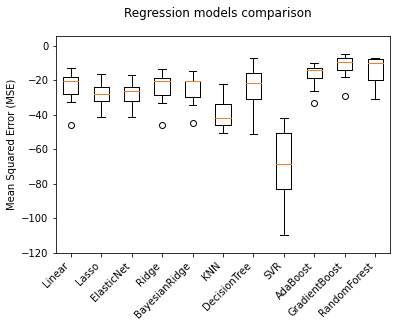

In [20]:
# создадим и обучим все остальные модели из списка возможных для задачи регресии
# и сравним их результаты работы

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
seed    = None
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:.2f}, {:.2f}".format(model_name, round(results.mean(), 3), 
                                  round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure();
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
plt.show();

### ⛳ Более практическое объяснение DL и домашняя работа:

Устройство нейронных сетей имитирует человеческий мозг
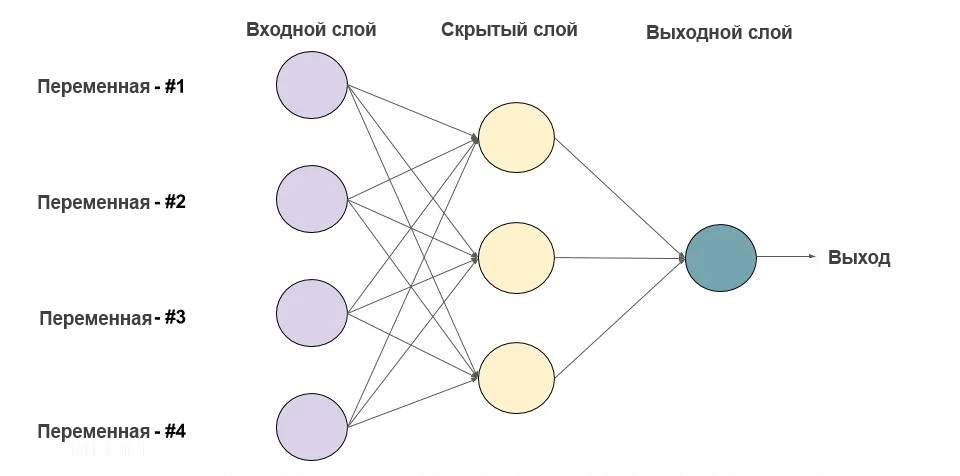

Эти алгоритмы более сложные и используют больше параметров, требуют больше места, памяти и ресурсов для работы. В остальном с точки зрения написания кода алгоритм тот же самый: создаём модель -> обучаем -> предсказываем и оцениваем.

### 🔢 Нейронная сеть, распознающая цифры по фотографии (домашнее задание)
Давайте создадим модель (нейросеть), которая будет определять по фото что за цифра на нём написана. Это, подобно титанику в анализе данных, первая классическая задача DL.

Обучать модель будем на наборе данных "MNIST" - это большая база данных рукописных цифр, которая обычно используется для создания различных систем обработки изображений. Она содержит 70 000 изображений рукописных цифр.


✅ Задание 1: Подумайте, это задача классификации или регресии? Напишите ответ ниже

__поле для ответа__

In [26]:
# скачиваем файл с данными (на этот раз он встроен в библиотеку sklearn)
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)

In [22]:
# делим данные на обучение и тест
X = pd.DataFrame(mnist_data.data) # характеристики
y = mnist_data.target # таргет
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# создадим модель SGDClassifier
# ВНИМАНИЕ! Обучение может занять несколько минут
from sklearn.linear_model import SGDClassifier
 
sgd_clf = SGDClassifier(loss='hinge', random_state=42) # 1
sgd_clf.fit(X_train, y_train) # 2

SGDClassifier(random_state=42)

In [24]:
# здесь посчитаем метрики :)
scoreSVM = sgd_clf.score(X_test, y_test) # 4
print("Test score of the Linear SVM: ", scoreSVM)

Test score of the Linear SVM:  0.8717142857142857


✅ Задание 2: На основе первого ответа попробуйте найти в документации ещё какие-нибудь модели из sklearn, подходящие для данной задачи и обучить их на том же наборе даных. Количество моделей неограниченно:) В качестве итога можете посчитать метрику score и выбрать наилучшую модель.

In [ ]:
# здесь можете написать Ваш код

In [ ]:
# здесь можете написать Ваш код

✅ Задание 3*: Попробуйте сделать предсказание на своей собственной картинке и убедиться в корректности работы модели. Для этого необходимо нарисовать/сфотографировать цифру и преобразовать её в бинарный формат (набор чисел) - это можно сделать, например, при помощи сервиса  https://www.dcode.fr/binary-image 

Пример для такой цифры:

five2.png

In [25]:
sgd_clf.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array(['5'], dtype='<U1')